**Aluno:** Felipe Bizzo da Silva -------------------- **RA:** 155351-8

# Problema 9.14
Ciclo rankine com reaquecimento

In [ ]:
!pip install pyromat

In [ ]:
import pyromat as pm
import numpy as np

pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100

mp_water = pm.get("mp.H2O")

In [ ]:
p1 = 10
s1 = mp_water.ss(p=p1)[0]
T1 = mp_water.Ts(p=p1)[0]
h1 = mp_water.hs(p=p1)[0]

p2 = 3500
s2 = s1

v = 1/mp_water.ds(p=p1)[0]

w_p = v*(p2-p1)

h2 = h1+ w_p
T2 = mp_water.T_h(h=h2,p=p2)

print((f"T1 = {round(float(T1),1)} ºC"))
print((f"T2 = {round(float(T2),1)} ºC"))
print(f"h2 = {round(float(h2),1)} kJ/kg")
print(f"Volume específico 1: {round(float(v),5)} m^3/kg")
print(f"Trabalho requerido pela bomba: {round(float(w_p),1)} kJ/kg")

T1 = 319.0 ºC
T2 = 319.1 ºC
h2 = 195.3 kJ/kg
Volume específico 1: 0.00101 m^3/kg
Trabalho requerido pela bomba: 3.5 kJ/kg


In [ ]:
h2dash = mp_water.hs(p=p2)[0]
s2dash = mp_water.ss(p=p2)[0]
T2dash = mp_water.Ts(p=p2)[0]

h3dash = mp_water.hs(p=p2)[1]
s3dash = mp_water.ss(p=p2)[1]
T3dash = T2dash

In [ ]:
p3 = p2
T3 = 400 + 273.15
h3 = mp_water.h(p=p3, T=T3)
s3 = mp_water.s(p=p3, T=T3)

print(f"h3 = {round(float(h3),1)} kJ/kg")
print(f"s3 = {round(float(s3),1)} kJ/kg")

p4 = 800
s4 = s3
T4, x4 = mp_water.T_s(s=s4, p=p4, quality=True)
x4 = abs(x4)
h4 = mp_water.h(x=x4, p=p4)

print((f"T4 = {round(float(T4),1)} ºC"))
print(f"h4 = {round(float(h4),1)} kJ/kg")

w_HPt = h3-h4

print(f"Qualidade do vapor de pressão intermediária x4: {round(float(x4),4)}")
print(f"Trabalho gerado pela turbina HP: {round(float(w_HPt),1)} kJ/kg")

h3 = 3223.2 kJ/kg
s3 = 6.8 kJ/kg
T4 = 478.4 ºC
h4 = 2768.3 kJ/kg
Qualidade do vapor de pressão intermediária x4: 1.0
Trabalho gerado pela turbina HP: 454.9 kJ/kg


In [ ]:
p5 = p4
T5 = 400 + 273.15 
h5 = mp_water.h(p=p5, T=T5)
s5 = mp_water.s(p=p5, T=T5)

p6 = p1
s6 = s5

T6, x6 = mp_water.T_s(s=s6, p=p6, quality=True)
h6 = mp_water.h(x=x6, p=p6)

w_LPt = h5-h6

print(f"Qualidade do vapor de pressão baixa x6: {round(float(x6),4)}")
print(f"Trabalho gerado pela turbina LP: {round(float(w_LPt),1)} kJ/kg")
print(f"Trabalho total na turbina: {round(float(w_HPt+w_LPt),1)} kJ/kg")

Qualidade do vapor de pressão baixa x6: 0.9233
Trabalho gerado pela turbina LP: 867.3 kJ/kg
Trabalho total na turbina: 1322.2 kJ/kg


In [ ]:
q_H = (h3-h2)+(h5-h4)
print(f"Calor gerado pela caldeira: {round(float(q_H),1)} kJ/kg")

Calor gerado pela caldeira: 3527.2 kJ/kg


In [ ]:
q_L = h6-h1
print(f"Calor rejeitado pelo condensador: {round(float(q_L),1)} kJ/kg")

Calor rejeitado pelo condensador: 2208.6 kJ/kg


In [ ]:
eta_th = (w_HPt+w_LPt-w_p)/q_H*100
print(f"Eficiência térmica: {round(float(eta_th),1)}%")

Eficiência térmica: 37.4%


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text([7.67350869], [318.9556078], '(6)\nT = 478.37 K\nh = 2768.3 kJ/kg \nx = 0.923')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


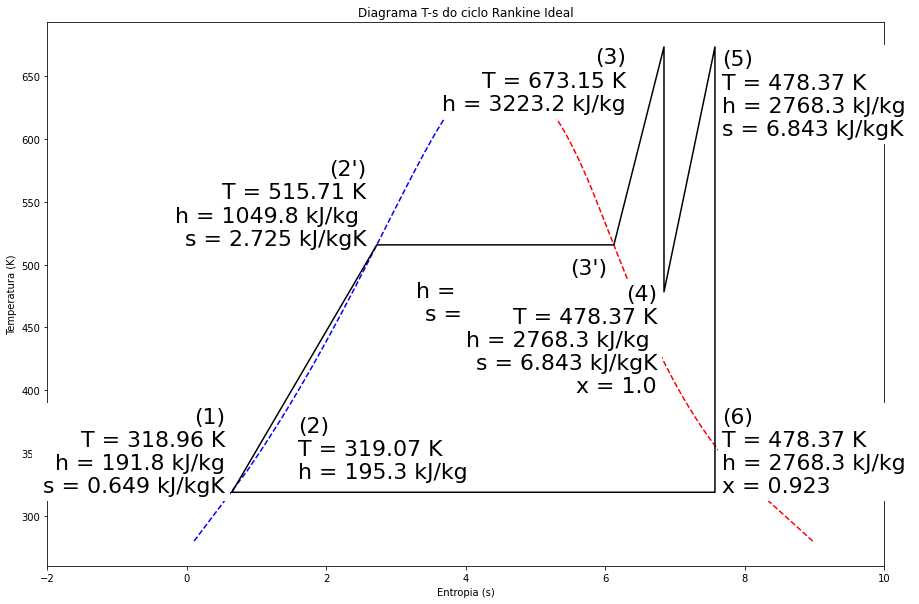

In [ ]:
import matplotlib.pyplot as plt

p = np.linspace(1,22063,1000)
T = mp_water.Ts(p=p)
s = mp_water.ss(p=p)

font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.figure(figsize=(15,10))
plt.title('Diagrama T-s do ciclo Rankine Ideal')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperatura (K)')
plt.xlabel('Entropia (s)')
plt.xlim(-2,10)
#plt.ylim(200,800)
plt.plot([s1, s2, s2dash, s3dash, s3, s4, s5, s6, s1],[T1, T2, T2dash, T3dash, T3, T4, T5, T6, T1], 'black')

plt.text(s1-.1,T1,f'(1)\nT = {round(float(T1),2)} K\nh = {round(float(h1),1)} kJ/kg\n s = {round(float(s1),3)} kJ/kgK',
    ha='right',backgroundcolor='white')
plt.text(1.6,330,f'(2)\nT = {round(float(T2),2)} K\nh = {round(float(h2),1)} kJ/kg',
    ha='left',backgroundcolor='white')
plt.text(s2dash-.15,T2dash,f"(2')\nT = {round(float(T2dash),2)} K\nh = {round(float(h2dash),1)} kJ/kg \ns = {round(float(s2dash),3)} kJ/kgK",
    ha='right',backgroundcolor='white')
plt.text(s3dash-.1,T3dash-60,f"(3')\nh = {round(float(h3dash),1)} kJ/kg \ns = {round(float(s3dash),3)} kJ/kgK",
    ha='right',backgroundcolor='white')
plt.text(6.3,T3-50,f'(3)\nT = {round(float(T3),2)} K\nh = {round(float(h3),1)} kJ/kg',
    ha='right',backgroundcolor='white')
plt.text(s4-.1,T4-80,f'(4)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK\nx = {round(float(x4),3)}',
    ha='right',backgroundcolor='white')
plt.text(s5+.1,T5-70,f'(5)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s6+.1,T6,f'(6)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \nx = {round(float(x6),3)}',
    ha='left',backgroundcolor='white')